# Keypoints and Bounding box

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch, Rectangle
from copy import copy

import sys
sys.path.append('../DataLoader')

from Dataset import Dataset
from helpers import imshow, world_to_img

## Creation of a Dataset container

In [2]:
DATASET_PATH= '/Users/nathanael.bloch/Documents/Tools/Notebooks/tmp remove it'
dp = Dataset(path=DATASET_PATH)[0]

## Face keypoints and bounding box

In [3]:
def show_keypoints(img, keypoints, visible, title, convention='ij'):
    # Convention can be either 'ij' (pixel coordinates) or 'xy' (cartesian coordinates)
    color = np.where(visible[:, np.newaxis], [[0, 1, 0]], [[1, 0, 0]])
    imshow(img)
    if convention == 'ij':
        plt.scatter(keypoints[:, 1], keypoints[:, 0], s=5, c=color)
    elif convention == 'xy':
        plt.scatter(keypoints[:, 0], keypoints[:, 1], s=5, c=color)


    pop_invisible = Patch(color=[1, 0, 0], label='Invisible')
    pop_visible = Patch(color=[0, 1, 0], label='Visible')

    plt.legend(handles=[pop_visible, pop_invisible])
    plt.title(title)

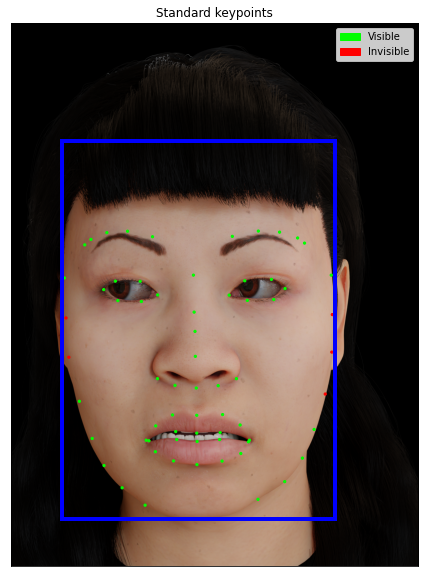

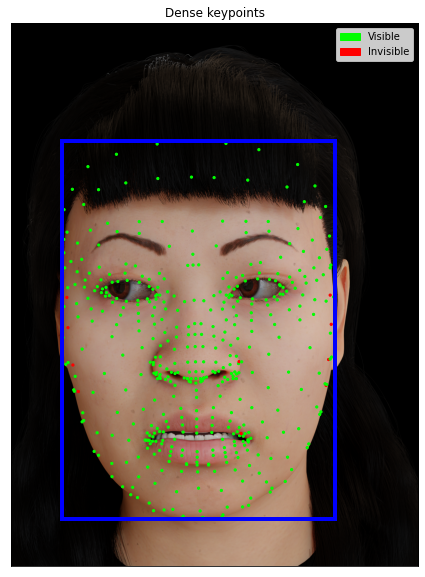

In [4]:
rect1 = Rectangle((dp.min_y, dp.min_x), dp.max_y - dp.min_y, dp.max_x - dp.min_x, linewidth=4, edgecolor='b', facecolor='none')
rect2 = copy(rect1)
show_keypoints(img=dp.rgb_img, keypoints=dp.keypoints_2d_coordinates, visible=dp.is_visible, title='Standard keypoints')
plt.gca().add_patch(rect1)
show_keypoints(img=dp.rgb_img, keypoints=dp.dense_keypoints_2d_coordinates, visible=dp.dense_is_visible, title='Dense keypoints')
plt.gca().add_patch(rect2)

## Eye keypoints

Text(0.5, 1.0, 'Pupil and iris keypoints')

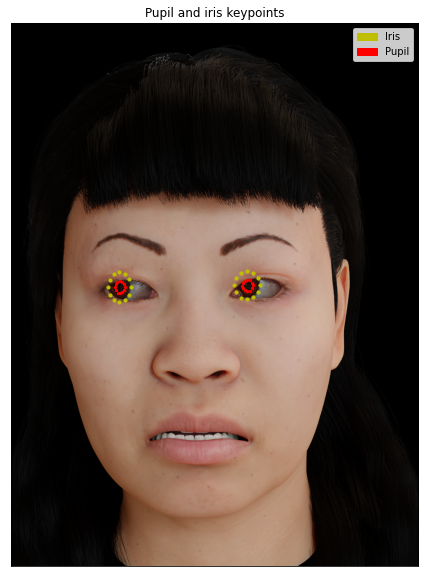

In [5]:
iris_keypoints = np.vstack([dp.iris_circle.key_2d.camera.right_eye, dp.iris_circle.key_2d.camera.left_eye])
pupil_keypoints = np.vstack([dp.pupil_circle.key_2d.camera.right_eye, dp.pupil_circle.key_2d.camera.left_eye])
eye_keypoints = np.vstack([iris_keypoints, pupil_keypoints])

imshow(dp.rgb_img)
plt.scatter(iris_keypoints[:, 1], iris_keypoints[:, 0], s=10, c='y')
plt.scatter(pupil_keypoints[:, 1], pupil_keypoints[:, 0], s=5, c='r')

plt.legend(handles=[Patch(color='y', label='Iris'), Patch(color='r', label='Pupil')])
plt.title('Pupil and iris keypoints')

## Visualization of important points

2D points have to be flipped before plotting since they are given in pixel coordinates

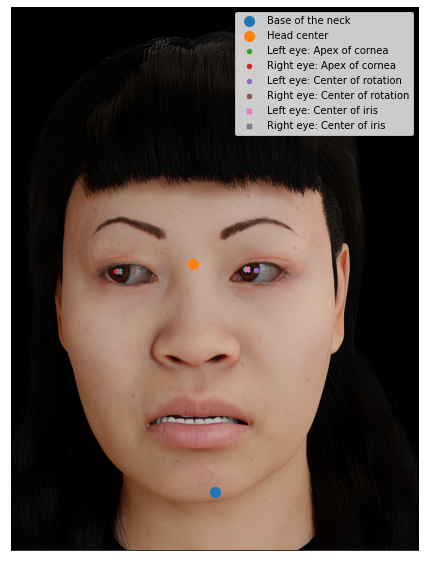

In [6]:
head_root = world_to_img(dp.head_metadata.head_root_location, dp.intrinsic_matrix, dp.extrinsic_matrix)
head_center = world_to_img(dp.head_metadata.head_six_dof.location, dp.intrinsic_matrix, dp.extrinsic_matrix)

imshow(dp.rgb_img)
plt.scatter(*head_root, s=100, label='Base of the neck')
plt.scatter(*head_center, s=100, label='Head center')
plt.scatter(*np.flip(dp.apex_of_cornea_point.key_2d.camera.left_eye), s=20, label='Left eye: Apex of cornea')
plt.scatter(*np.flip(dp.apex_of_cornea_point.key_2d.camera.right_eye), s=20, label='Right eye: Apex of cornea')
plt.scatter(*np.flip(dp.center_of_rotation_point.key_2d.camera.left_eye), s=20, label='Left eye: Center of rotation')
plt.scatter(*np.flip(dp.center_of_rotation_point.key_2d.camera.right_eye), s=20, label='Right eye: Center of rotation')
plt.scatter(*np.flip(dp.center_of_iris_point.key_2d.camera.left_eye), s=30, marker='X', label='Left eye: Center of iris')
plt.scatter(*np.flip(dp.center_of_iris_point.key_2d.camera.right_eye), s=30, marker='X', label='Right eye: Center of iris')


plt.legend()